1. Split the dataset into training (80%) and testing (20%) sets.

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("..\data\X_reduced_with_target.csv")
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

2. Train the models

In [80]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [81]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [82]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [83]:
# Support Vector Machine
from sklearn.svm import SVC
svm_model = SVC(probability = True,random_state=42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

3. Evaluate the models and save metrics

In [84]:
# Accuracy, Precision, Recall, F1-score & AUC Score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import os

models = {
    'Logistic Regression': log_model,
    'Decision Tree': tree_model,
    'Random Forest': rf_model,
    'SVM': svm_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name}")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    print('-' * 50)

if not os.path.exists("../results"):
    os.makedirs("../results")

metrics_path = "../results/evaluation_metrics_supervised.txt"
with open("../results/evaluation_metrics_supervised.txt", "w") as f:
    for name, model in models.items():
        y_pred = model.predict(X_test)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        report = classification_report(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        
        f.write(f"{name}\n")
        f.write(report + "\n")
        f.write(f"Accuracy: {acc}\n")
        f.write(f"AUC: {auc}\n")
        f.write("-" * 50 + "\n")

Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Accuracy: 0.8852459016393442
AUC: 0.9458874458874459
--------------------------------------------------
Decision Tree
              precision    recall  f1-score   support

           0       0.76      0.79      0.78        33
           1       0.74      0.71      0.73        28

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61

Accuracy: 0.7540983606557377
AUC: 0.7456709956709956
--------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.85      0.85  

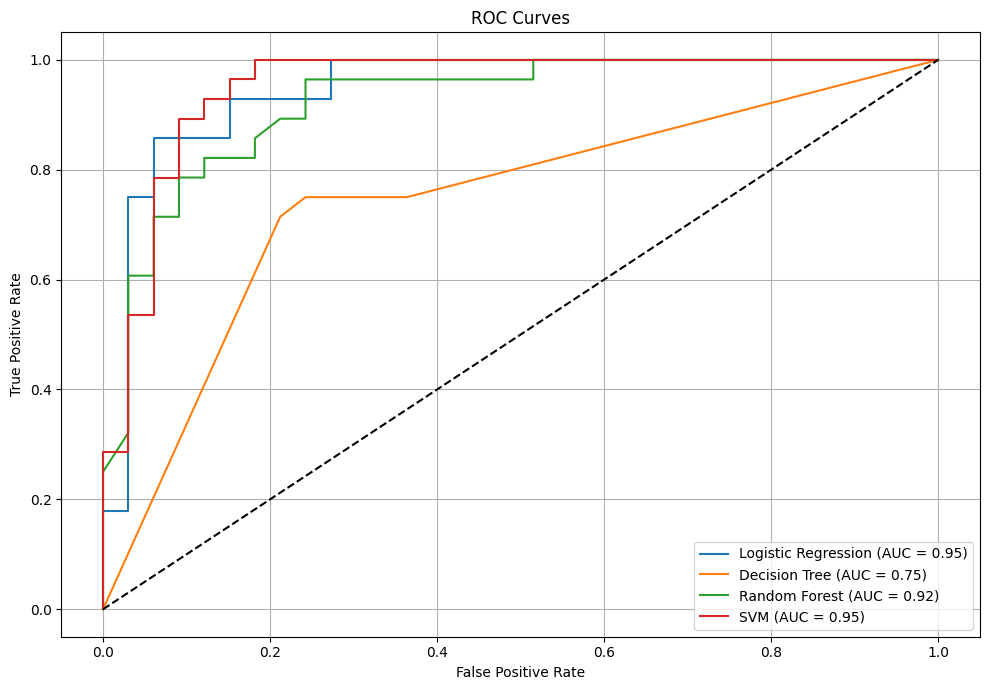

In [85]:
# ROC Curve
plt.figure(figsize=(10, 7))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()